<div align="center">
  <h2> Méthodes quantitatives en neurosciences </h2>
</div>

<div align="center">
<b><i> Cours NSC-2006, année 2015</i></b><br>
<b>Laboratoire d'analyse de données multidimensionnelle-Réponses</b><br>
     *Pierre Bellec, Yassine Ben Haj Ali*
</div>

### Objectif:

Ce laboratoire a pour but de vous initier à la manipulation
d’informations multidimensionnelles avec Matlab. Nous allons pour cela
analyser des données électrophysiologiques de décharges d’activité
neuronale. Nous allons effectuer différentes opérations visant à
**visualiser**, **résumer** et **modéliser** ces données. Les données
sont tirée de l’expérience de Georgopoulos1982 sur l’encodage
neuronale du mouvement du bras chez un macaque avec des implants
neuronaux. L’animal commence l’expérience en fixant un curseur au centre
d’une cible, ensuite il doit rejoindre des cibles périphériques
apparaissent dans une des 8 directions arrangé en cercle. Une fois 
la cible apparue, l’animal doit attendre ( 100-1500 ms) le signal de départ avant d’aller rejoindre la cible pour
une durée de 500ms, ensuite il retourne au point de départ (au centre).
Cette séquence de mouvement est appelée essai et dans cette expérience
il y en a 47. Le but de l’expérience de Georgopoulos et collègues est de
déterminer l’orientation spatiale préférentielle du neurone en question
dans la région MI, et qu’il est possible de prédire la direction du
mouvement à partir d’enregistrements physiologiques. Leurs résultats
indiquent qu’il y a bel et bien une préférence vers les angles de
mouvement entre 90 et 180 degrés. Durant ce travail nous allons reproduire certaines des analyses de données et
la visualisation des résultats de cette expérience.

Pour réaliser ce laboratoire, il est nécessaire de récupérer les
resources suivantes sur [studium](https://studium.umontreal.ca/):

-   Chap17_Data.mat: le jeu de données tiré de Georgopoulos1982.

-   Les scripts `diagramme_dispersion.m` et `diagramme_dispersion_essais.m` pour la Section 1.

-   Les scripts `histogramme_essai1.m`, `histogramme_essais.m` pour la Section 2.

Notez que le laboratoire est noté. Il faudra remettre un rapport
détaillé incluant une réponse pour l’ensemble des questions numérotées
ci dessous. Chaque réponse fera typiquement quelques lignes, incluant du
code et une figure si demandé dans l’énoncé.

Ne pas tenir compte et ne pas executer cette partie du code:

In [1]:
%matplotlib inline
from pymatbridge import Matlab
mlab = Matlab()
mlab.start()
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
..MATLAB started and connected!
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


In [1]:
%matplotlib inline
from pymatbridge import Octave
octave = Octave()
octave.start()
%load_ext pymatbridge

Starting Octave on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.Octave started and connected!
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


### Section 1 : Diagramme de dispersion

Nous allons commencer par effectuer un **diagramme de dispersion**
(scatter plot) de l’activation d’un neurone tout au long de la durée
d’un essai. Voir le script pour suivre ces étapes.

<ol start="1">
  <h4><li>Commençons par charger les données:</li></h4>
</ol>

In [2]:
%%matlab
load('Chap17_Data')

<ol start="2">
  <h4><li>La commande `whos` nous permet de déterminer quelles variables sont disponibles dans l’espace de travail, ainsi que leur type.</li></h4>
</ol>

In [3]:
%%matlab
whos

Variables in the current scope:

   Attr Name             Size                     Bytes  Class
   ==== ====             ====                     =====  ===== 
        direction      158x1                       1264  double
        go             158x1                       1264  double
        instruction    158x1                       1264  double
        spike            1x47                     24296  struct
        unit             1x143                 11808319  struct

Total is 664 elements using 11836407 bytes



- Quelles variables sont présentes? Quel est le type de la variable spike? Quelle est sa taille?

    Les variables sont `direction`, `go`, `intruction`, `spike` et `unit`. La variable `spike` est de type structure et de taille 1x47

<ol start="3">
  <h4><li>La variable spike contient les temps des potentiels d’action détectés pour
    un neurone. Chaque entrée de la structure contient les données d’un
    essai différent. Il est possible de lister les champs de la
    structure avec la commande fieldnames:</li></h4>
</ol>

In [4]:
%%matlab
fieldnames(spike)

ans = 
{
  [1,1] = times
}


    Le champ "spikes(1).times" contient les temps de décharges de potentiels d’action pour
    le premier essai. La commande permet de déterminer la taille de ce
    vecteur, c’est à dire le nombre de décharges détectées:

In [5]:
%%matlab
size(spike(1).times)

ans =

   52    1



- Combien y-a-t-il eu de décharges pour l’essai 2? pour l’essai 10?

In [6]:
%%matlab
size(spike(2).times) %nb de décharges pour l'essai 2

ans =

   51    1



Il y a 51 décharges pour l'essai 2.

In [7]:
%%matlab
size(spike(10).times) %nb de décharges pour l'essai 10

ans =

   85    1



Il y a 85 décharges pour l'essai 10.

<ol start="4">
  <h4><li> La commande suivante va présenter l’ensemble des temps de décharge pour l’essai 1. </li></h4>
</ol>

```       
        >> spike(1).times
           -0.9893
           -0.9402
           -0.9158
        (...) 
```

-    Quelle est l’unité probable de ces temps? Pourquoi y-a-t-il des
    valeurs négatives?

    l'unité est en millisecondes et les valeurs négatives indiquent un temps de décharge qui précède le signal de départ le de l'expérience

<ol start="5">
  <h4><li> On extrait les temps de décharges des deux premiers essais dans deux
    variables `t1` et `t2`: </li></h4>
</ol>


In [8]:
 %%matlab
 t1 = spike(1).times; 
 t2 = spike(2).times; 

<ol start="6">
  <h4><li> On ouvre une nouvelle fenêtre, dédiée à la visualisation: </li></h4>
</ol> 

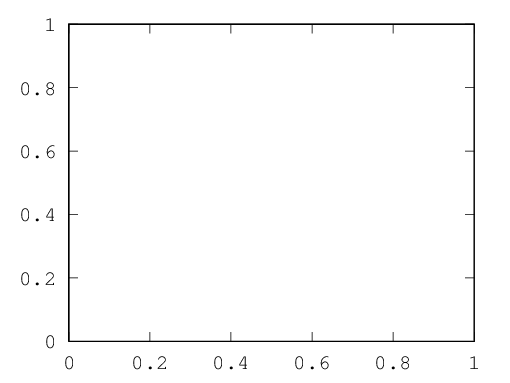

In [9]:
%%matlab
figure 
hold on 

    Attention à la deuxième instruction! Elle permet de dessiner
    plusieurs objets sur une même figure, l’un à la suite de l’autre,
    sans ré-initialiser la figure.

<ol start="7">
  <h4><li> Maintenant on va tracer la première ligne du diagramme. Notez que le
    nombre de décharges dans l’essai 1 est . On applique une boucle : </li></h4>
</ol>

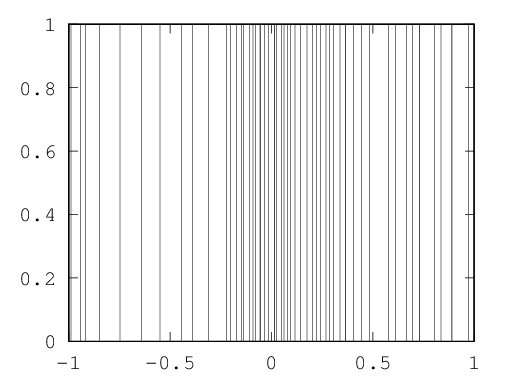

In [10]:
%%matlab
for num_temps = 1:length(t1) 
    line([t1(num_temps) t1(num_temps)], [0 1]) 
end

    Notez l’utilisation de la commande line.

<ol start="8">
  <h4><li> On va maintenant ajouter un label sur l’axe des x et y . </li></h4>
</ol>
<ol start="9">
  <h4><li> Sauvegardez la figure dans un fichier png (utilisez la commande print), sous le nom figure_dispersion.png </li></h4>
</ol>

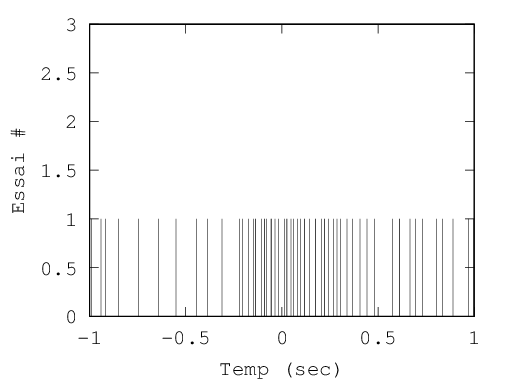

In [17]:
%%matlab
for num_temps = 1:length(t1) 
    line([t1(num_temps) t1(num_temps)], [0 1]) 
end
xlabel('Temp (sec)'); 
%Idem pour l’axe des y:
ylabel('Essai #')
%Enfin, on fixe les limites de l’axe des y
ylim([0 3])
% save the result
print('figure_dispersion.png','-dpng')

<ol start="10">
  <h4><li> Faire une nouvelle figure où chaque barre du diagramme a une hauteur
    de 0.5, plutôt que 1. Sauvegardez ce fichier sous le nom "figure_dispersion_lignes.png". </li></h4>
</ol>

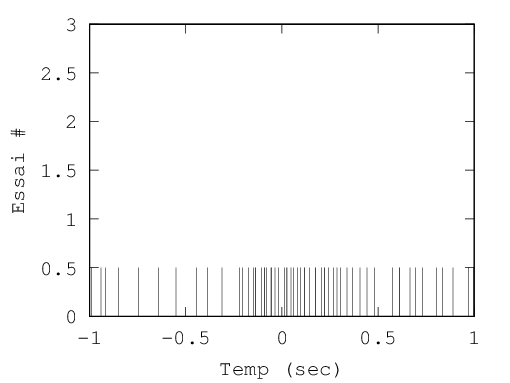

In [18]:
%%matlab
for num_temps = 1:length(t1) 
    line([t1(num_temps) t1(num_temps)], [0 0.5]) 
end
xlabel('Temp (sec)')
%Idem pour l’axe des y:
ylabel('Essai #')
%Enfin, on fixe les limites de l’axe des y
ylim([0 3])

<ol start="11">
  <h4><li> Vous allez compléter, à partir du fichier , les 4 lignes de code
    manquante à l’interieure de la boucle pour tracer tous les essais
    (47) dans une même figure. Le résultat ressemblerait à la figure
    suivante: </li></h4>
</ol>

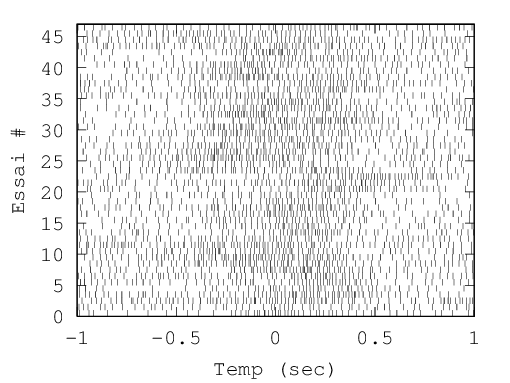

In [14]:
%%matlab
% Charger les donnees
load('Chap17_Data')
% Preparer une figure
figure 
% permettre la superposition de plusieurs graphiques dans la meme figure
hold on 
% Donner un label à l'axe des x
xlabel('Temp (sec)'); 
% Donner un label à l'axe des y
ylabel('Essai #');
% Ajuster les limites de l'axe des y
ylim([0 length(spike)]);

for num_spike = 1:length(spike) %faire une boucle pour tout les essaies
    t = spike(num_spike).times; %definir la variable pour chaque essai
    for num_temps=1:length(t) %faire une boucle pour tous les points temps
        line([t(num_temps) t(num_temps)], [0+(num_spike-1) 1+(num_spike-1)]); %dessiner une line pour chaque point temps t1(i) avec longueur de 1
    end
end

### Section 2 : Histogramme

Nous allons continuer l’exploration des données à travers un histogramme
qui résumerait la somme des activations dans un intervalle de temps
donné. Voir le script `histograme_essai1.m` pour reproduire les commandes suivantes:

<ol start="1">
  <h4><li>Commençons par nettoyer l’espace de travail: </li></h4>
</ol>

In [19]:
%%matlab
clear         

<ol start="2">
  <h4><li> Chargeons de nouveau les données: </li></h4>
</ol>

In [20]:
%%matlab
load('Chap17_Data')

<ol start="3">
  <h4><li>Définissons les bords et le pas des catégories de l’histogramme </li></h4>
</ol>

In [21]:
%%matlab
centres = [-0.95:0.1:0.95];

<ol start="4">
  <h4><li>Initialiser une matrice de zéros dont la longueur est égale au
    nombre d’intervalles: </li></h4>
</ol>

In [22]:
%%matlab
histo = zeros(1,length(centres));

<ol start="5">
  <h4><li>Récupérez le nombre de décharges par intervalle de temps dans
    l’essai numéro 1, à l’aide avec la fonction . </li></h4>
</ol>

In [23]:
%%matlab
histo = hist(spike(1).times,centres); 

- Examinez le contenu de la variable `histo`. Quelle est sa taille ? Son minimum, maximum, sa moyenne (voir les fonctions matlab `min, max, mean` ).

In [24]:
%%matlab
whos histo % elle est de taille 1x20

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        histo       1x20                       160  double

Total is 20 elements using 160 bytes



In [25]:
%%matlab
min(histo)
max(histo)
mean(histo)

ans =  1
ans =  6
ans =  2.6000


<ol start="6">
  <h4><li>Dessinez l’histogramme avec la fonction `bar`. </li></h4>
</ol>

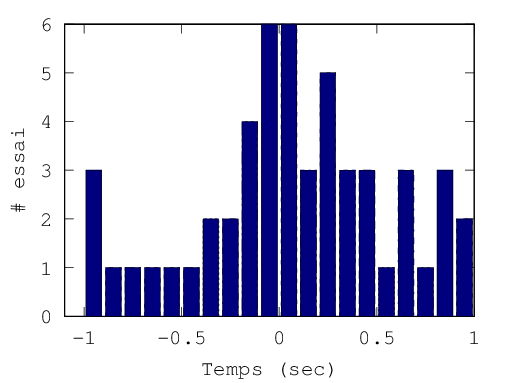

In [26]:
%%matlab
bar(centres,histo);
 %Ajuster les limites de l’axe des x
xlim([-1.1 1]);
xlabel('Temps (sec)');  %Donner un label à l’axe des x
ylabel('# essai');%Donner un label à l’axe des y

<ol start="10">
  <h4><li>Reprenez le code du fichier et remplissez la boucle afin de réaliser
    un histogramme pour l’ensemble des essais </li></h4>
</ol>

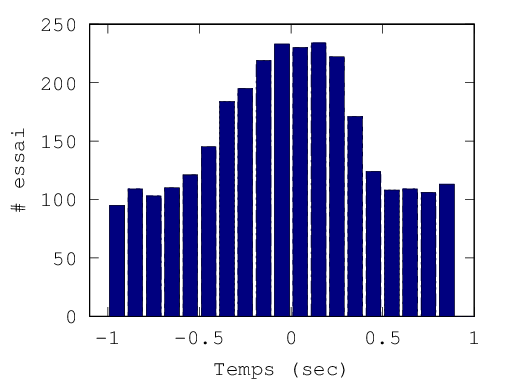

In [23]:
%%matlab
%Charger les donnees
load('Chap17_Data')

% Definir les centres des intervalles pour l'histogramme
centres = [-0.95:0.1:0.95];

% Initialiser une matrice de zéros histo dont la longueur est égale au nombre d'intervalles:
histo = zeros(length(centres),1);

% Faire une boucle à travers tous les essais et recuperer le nombre de decharges par intervalle avec la fonction histc 
for jj = 1:47
    histo=histo+histc(spike(jj).times,centres);
end

% Dessiner l'histograme avec la fonction bar
bar(centres,histo);

%Ajuster les limites de l'axe des x
xlim([-1.1 1]);

%Donner un label à l’axe des x
xlabel('Temps (sec)');  

%Donner un label à l’axe des y
ylabel('# essai');

###Section 3 : Régression

Nous allons maintenant implémenter une régression à l’aide de Matlab.

<ol start="1">
  <h4><li>Commençons par nettoyer l’espace de travail: </li></h4>
</ol> 

In [27]:
%%matlab
clear

<ol start="2">
  <h4><li>Maintenant nous allons récuperer les données de “notes” du cours. </li></h4>
</ol> 

In [28]:
%%matlab
x = [ 165 165 157 170 175 165 182 178 ]';
y = [  47  56  49  60  82  52  78  90 ]';          

- Quels est la taille et le contenu des vecteurs x et y? A quoi sert l'opération `'` ?

La taille des vecteurs x et y est de 8x1, c’est-à-dire 8 lignes avec 1 élément.
L’opération ’ sert à transposer un vecteur. On transpose les vecteurs lignes en
vecteurs colonnes, et réciproquement.

In [29]:
%%matlab
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        x           8x1                         64  double
        y           8x1                         64  double

Total is 16 elements using 128 bytes



<ol start="3">
  <h4><li>On définit une nouvelle fonction en ligne: </li></h4>
</ol>

In [30]:
%%matlab
ftheta = inline('theta(1)+theta(2)*x','theta','x');

- Quel est le type de la variable `ftheta`?

In [6]:
%%matlab
whos ftheta

  Name        Size            Bytes  Class     Attributes

  ftheta      1x1              1238  inline              



<ol start="4">
  <h4><li>Estimez les coefficients de régression à l’aide de la fonction : </li></h4>
</ol>

In [32]:
%%matlab
% theta_chap = nlinfit(x, y, ftheta, [1 1] );
theta_chap = [-237.5729    1.7794];

- Quelles sont les valeurs de `theta_chap`? A quoi sert l’argument `[1 1]`? Essayez de reproduire l’estimation avec d’autres valeurs pour cet argument, est-ce que cela affecte le résultat?

Le paramètre `theta_chap` vaut [-237.5729 1.7794]. L'argument [1 1] est une valeur initiale de la méthode qui cherche la valeur `theta_chap`. En répétant l'expérience pour plusieurs valeurs ([2 2], [30 30], [-30 -30]) on voit que la résultat `theta_chap` ne semble pas dépendre ici de ce paramètre. 

<ol start="5">
  <h4><li>Maintenant représenter le résultat de la régression. </li></h4>
</ol> 

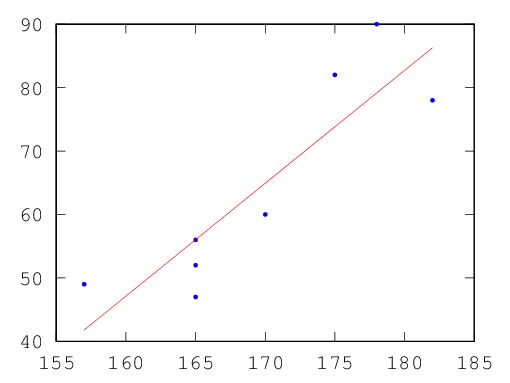

In [33]:
%%matlab
figure
plot(x,y,'b.');
hold on
plot(x,ftheta(theta_chap,x),'r');
            

<ol start="6">
  <h4><li>Utilisez la fonction `ylim` pour changer les limites de l’axe y de 40 à 95.
    Ajouter le label `taille` sur l’axe des x avec la commande `xlabel`, et le label `poids` sur
    l’axe des y avec la commande `ylabel`. Faites une sauvegarde de cette image,
    dans un fichier `regression_notes.png`. </li></h4>
</ol>

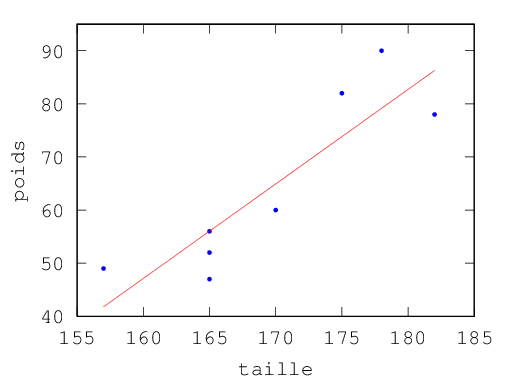

In [36]:
%%matlab
figure
plot(x,y,'b.');
hold on
plot(x,ftheta(theta_chap,x),'r');
ylim([40 95])
xlabel('taille')
ylabel('poids')
print('regression_notes.png','-dpng')

<ol start="7">
  <h4><li>Maintenant nous allons ajuster une courbe plus complexe, un cosinus.
    On commence par simuler des données: </li></h4>
</ol> 

In [39]:
%%matlab
clear
x = 0:0.1:30;
y = cos(x) + randn(1,301); 

- Quelle est la taille de x? La taille de y?  

In [41]:
%%matlab
size(x)
size(y)

ans =

     1   301

ans =

     1   301



Les variables `x` et `y` sont des vecteurs lignes de longueur 301.  

- A quoi sert la fonction `randn` (utilisez la commande `help` ).

In [43]:
%%matlab
help randn

'randn' is a built-in function from the file libinterp/corefcn/rand.cc

 -- Built-in Function: randn (N)
 -- Built-in Function: randn (M, N, ...)
 -- Built-in Function: randn ([M N ...])
 -- Built-in Function: V = randn ("state")
 -- Built-in Function: randn ("state", V)
 -- Built-in Function: randn ("state", "reset")
 -- Built-in Function: V = randn ("seed")
 -- Built-in Function: randn ("seed", V)
 -- Built-in Function: randn ("seed", "reset")
 -- Built-in Function: randn (..., "single")
 -- Built-in Function: randn (..., "double")
     Return a matrix with normally distributed random elements having
     zero mean and variance one.  The arguments are handled the same as
     the arguments for 'rand'.

     By default, 'randn' uses the Marsaglia and Tsang "Ziggurat
     technique" to transform from a uniform to a normal distribution.

     The class of the value returned can be controlled by a trailing
     "double" or "single" argument.  These are the only valid classes.

     Refer

La commande `randn` permet de simuler la génération de bruit suivant une distribution normale (Gaussienne) de moyenne nulle et de variance 1. 

- Générer un graphe de la relation entre x et y, et sauvegardez cette image dans un fichier `donnees_cosinus.png`.

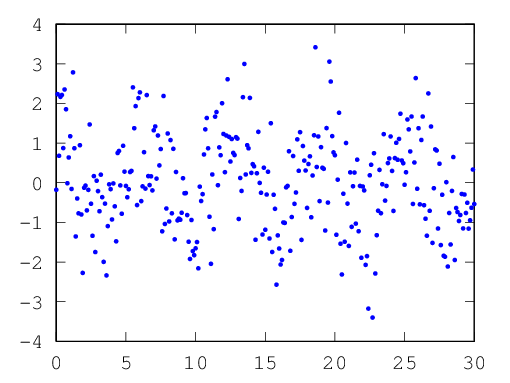

In [44]:
%%matlab
figure
plot(x,y,'.')
print('donnees_cosinus.png','-dpng')

<ol start="8">
  <h4><li>On va maintenant définir une fonction de trois paramètres: </li></h4>
</ol>

In [46]:
%%matlab
ftheta = inline('theta(1)+theta(2)*cos(x-theta(3))','theta','x');

- Quelle est la valeur de la fonction `ftheta` pour `theta=[0 1 1]` et `x=0` ?

In [48]:
%%matlab
ftheta([0 1 1],0)

ans =  0.54030


<ol start="9">
  <h4><li>Estimez les coefficients de régression à l’aide de la fonction : </li></h4>
</ol>

In [49]:
%%matlab
theta_chap = nlinfit(x, y, ftheta, [0 1 1] );    

- Quelles sont les valeurs de `theta_chap` ? 

La variable `theta_chap` vaut [-0.0216 1.1005 0.1539].

- A quoi sert l’argument
    `[0 1 1]` ? Essayez de reproduire l’estimation avec d’autres valeurs pour cet argument, est-ce que
    cela affecte le résultat?

L'argument [0 1 1] jour le même rôle que le paramètre [1 1] à la question 4. En utilisant une valeur différente du paramètre (par exemple [0 1 10]) on trouve une valeur différente pour `theta_chap`. C'est parce que la fonction `ftheta` est périodique, et il existe donc une infinité de valeurs d'entrée qui donnent la même sortie.

<ol start="10">
  <h4><li> Maintenant représenter le résultat de la régression. </li></h4>
</ol>

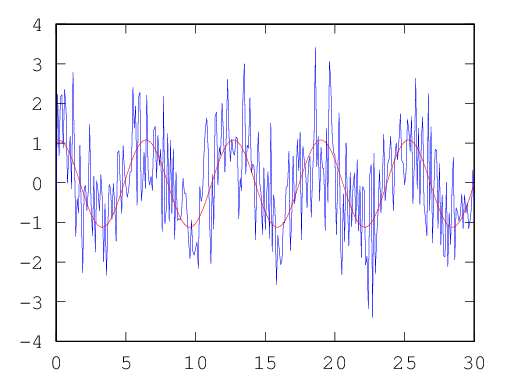

In [50]:
%%matlab
figure
plot(x,y,'b');
hold on
plot(x,ftheta(theta_chap,x),'r');
            

In [ ]:
    Faites une sauvegarde de cette image, dans un fichier .